# ggplot2

Now it's time to learn the real power of R. ggplot2 is the main reason people choose R for plotting and data analysis.

- ggplot2 is the most popular data visualization package for R
- Created by Hadley Wickham who also created dplyr and tidyr
- Follows a distinct "Grammar of Graphics"
- Built on the idea of adding layers

ggplot2 has several advantages:
- Plot specifications at high levels of abstraction
- Very flexible
- Theme system for polishing plot appearance
- Mature and complete graphics system
- Many users and active mailing lists
- Lot's of online help available (StackOverflow, etc...)

What ggplot2 is not ideal for:
- interactive graphics
- Graph Theory Plots (Graph Nodes)
- 3D Graphics

We will learn about other libraries better suited for those topics. As we go through this tutorial, it'll be helpful to use [this cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) for reference when using ggplot2.

ggplot2 also has great [documentation](http://docs.ggplot2.org/current/). It is most likely you will be referencing either the cheat sheet or the documentation (or these notes) when creating some of your first plots. 

# Grammer of the Graphics

ggplot is based on the grammar of graphics, the idea that you can build every graph from the same few components: a data set, a set of geometries, and a coordinate system. To display data values, map variables in the data set to aesthetic properties of the geometry like size, color, and x and y coordinates

## Layers for building visualizations

The first 3 layers are 
- Data 
- Aesthetics
- Geometry

Followed by 
- Facets
- Statistics
- Coordinates
- Theme

<img src="https://cxlabsblog.files.wordpress.com/2017/10/2017-10-24-14_36_29-visualization-layers-of-ggplot-google-docs.png?w=620">

We won't go too much in depth to the over all philosophy of the grammar of graphics because the best source of this is from the creator of ggplot, Hadley Wickham, who created a great paper on the topic which you can read [here](http://vita.had.co.nz/papers/layered-grammar.pdf).

As far as the syntax for grammar of graphics and ggplot, we can get a better understanding through some quick examples. In this lecture we'll quickly show some syntax examples, then in the following lectures we'll show various examples of specific plot types using qplot() and ggplot(), then we'll wrap our understanding by building off the final layers of the grammar of graphics and then having an assignment for recreating a plot.

## Data and Set-up


In [20]:
#install.packages('ggplot2')
library(ggplot2) # load the library

The general syntax of using ggplot2 will look like this:

ggplot(data = <default data set>, 
       aes(x = <default x axis variable>,
           y = <default y axis variable>,
           ... <other default aesthetic mappings>),
       ... <other plot defaults>) +

       geom_<geom type>(aes(size = <size variable for this geom>, 
                      ... <other aesthetic mappings>),
                  data = <data for this point geom>,
                  stat = <statistic string or function>,
                  position = <position string or function>,
                  color = <"fixed color specification">,
                  <other arguments, possibly passed to the _stat_ function) +

  scale_<aesthetic>_<type>(name = <"scale label">,
                     breaks = <where to put tick marks>,
                     labels = <labels for tick marks>,
                     ... <other options for the scale>) +

  theme(plot.background = element_rect(fill = "gray"),
        ... <other theme elements>)

We'll build up an understanding of this piece by piece. But first we'll need data! We'll use some real estate data available in this repo or you can download it here

In [23]:
library(data.table)
# You may need to put the entire file path to the downloaded csv file!
df <- fread('state_real_estate_data.csv')

In [27]:
head(df)
tail(df)
str(df)
summary(df)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
AK,West,20101,224952,160599,64352,28.6,1.481,1.552
AK,West,20102,225511,160252,65259,28.9,1.484,1.576
AK,West,20093,225820,163791,62029,27.5,1.486,1.494
AK,West,20094,224994,161787,63207,28.1,1.481,1.524
AK,West,20074,234590,155400,79190,33.8,1.544,1.885
AK,West,20081,233714,157458,76256,32.6,1.538,1.817


State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
DC,NA,20092,630361,148268,482092,76.5,2.409,2.802
DC,NA,20093,632103,148074,484029,76.6,2.415,2.817
DC,NA,20114,676463,165456,511007,75.5,2.585,3.025
DC,NA,20121,690234,166701,523532,75.8,2.637,3.107
DC,NA,20122,705645,167978,537666,76.2,2.696,3.198
DC,NA,20123,722514,169289,553225,76.6,2.761,3.299


Classes 'data.table' and 'data.frame':	7803 obs. of  9 variables:
 $ State           : chr  "AK" "AK" "AK" "AK" ...
 $ region          : chr  "West" "West" "West" "West" ...
 $ Date            : int  20101 20102 20093 20094 20074 20081 20082 20083 20084 20091 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.88 ...
 - attr(*, ".internal.selfref")=<externalptr> 


    State              region               Date         Home.Value    
 Length:7803        Length:7803        Min.   :19751   Min.   : 18763  
 Class :character   Class :character   1st Qu.:19843   1st Qu.: 62235  
 Mode  :character   Mode  :character   Median :19941   Median :108724  
                                       Mean   :19939   Mean   :135313  
                                       3rd Qu.:20033   3rd Qu.:172031  
                                       Max.   :20131   Max.   :862885  
 Structure.Cost     Land.Value     Land.Share..Pct. Home.Price.Index
 Min.   : 17825   Min.   :   938   Min.   : 5.00    Min.   :0.1350  
 1st Qu.: 53777   1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550  
 Median : 88352   Median :  9478   Median :10.40    Median :0.7830  
 Mean   : 99534   Mean   : 35779   Mean   :18.17    Mean   :0.8695  
 3rd Qu.:134871   3rd Qu.: 38631   3rd Qu.:26.30    3rd Qu.:1.2075  
 Max.   :325595   Max.   :594417   Max.   :81.70    Max.   :2.8930  
 Land.Price.I

# Using ggplot2
## A Quick Example with Histograms
Histograms are a great way of quickly exploring your data! We have a couple of options for quickly producing histograms off the columns of a data frame. We have:

- hist()
- qplot()
- ggplot()
They differ mainly in one main component, for each of these methods you usually trade-off ease of use for ability to customize.

__Important Note! In RStudio you'll need to call print(plot_name) to display your plots. Also the plots will look a lot better in RStudio than here in the notes.__

Let's show quick use cases of each:

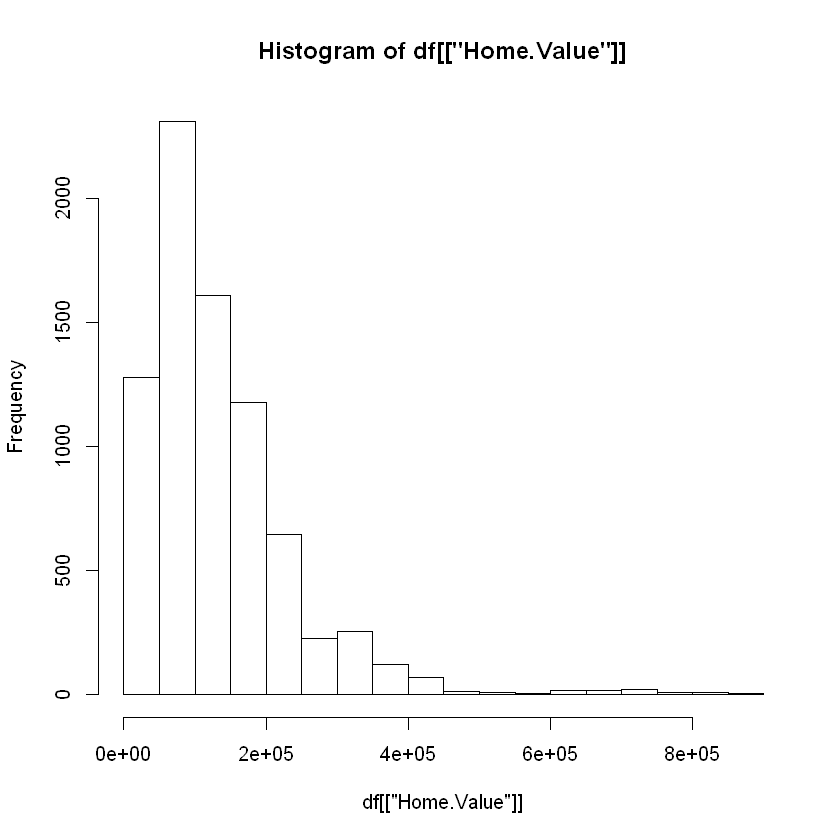

In [28]:
# Pass a column straight into hist()
hist(df[['Home.Value']])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


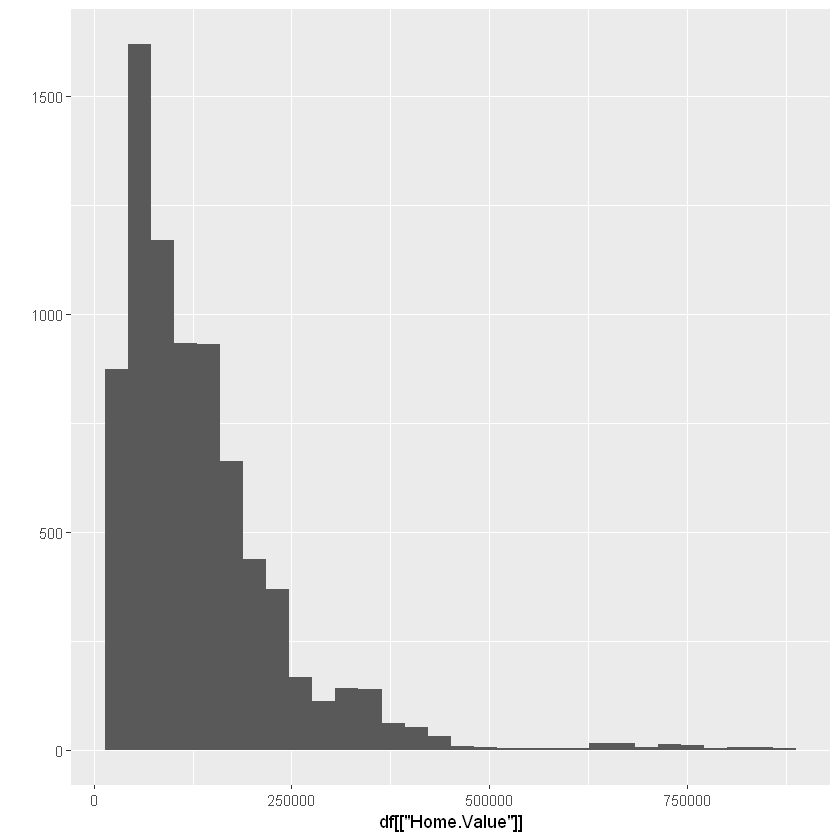

In [29]:
qplot(df[['Home.Value']])


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


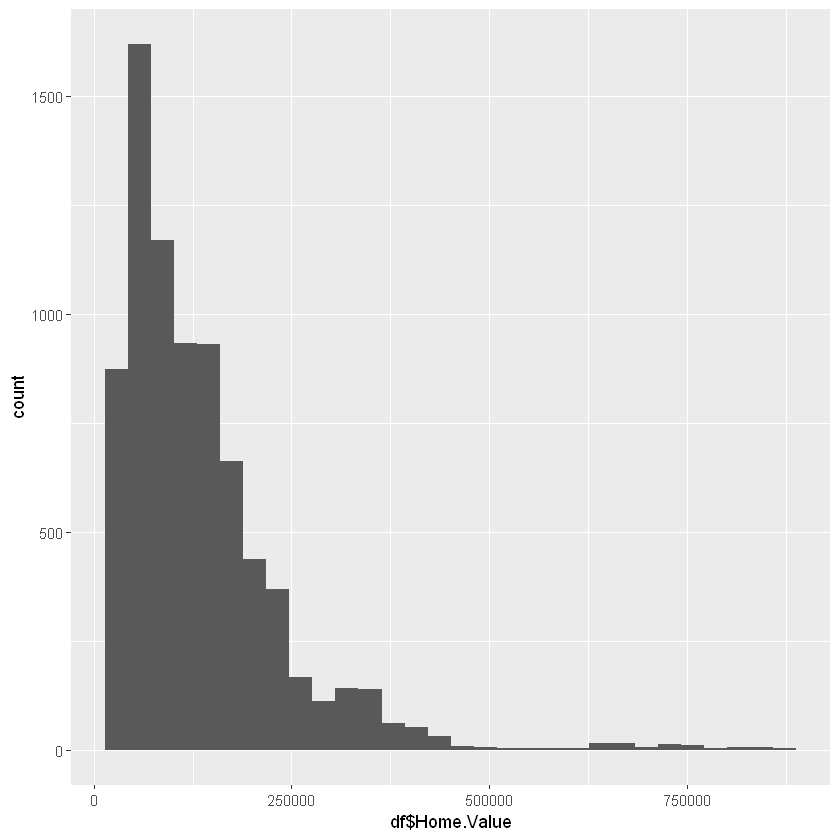

In [31]:
# Using ggplot, lots of ability to customize, but bit more complicated!
ggplot(data = df,aes(df$Home.Value))+geom_histogram()

So what method should we choose? Usually the qplot() function will give us a nice balance between ease of use and ability to customize, let's quickly break down the syntax for using qplot().

## qplot
The qplot() function can be used to create the most common graph types. While it does not expose ggplot's full power, it can create a very wide range of useful plots. The format is:

    qplot(x, y, data=, color=, shape=, size=, alpha=, geom=, method=, formula=, facets=, xlim=, ylim= xlab=, ylab=, main=, sub=)
    
    
## Quick Example of Customization¶
Let's explore qplot further! In the last example we just passed a single column and qplot automatically knew to do a histogram, from now on we're going to be a little more formal and pass in the entire data source and then specify what columns to grab and how to plot it:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 94 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

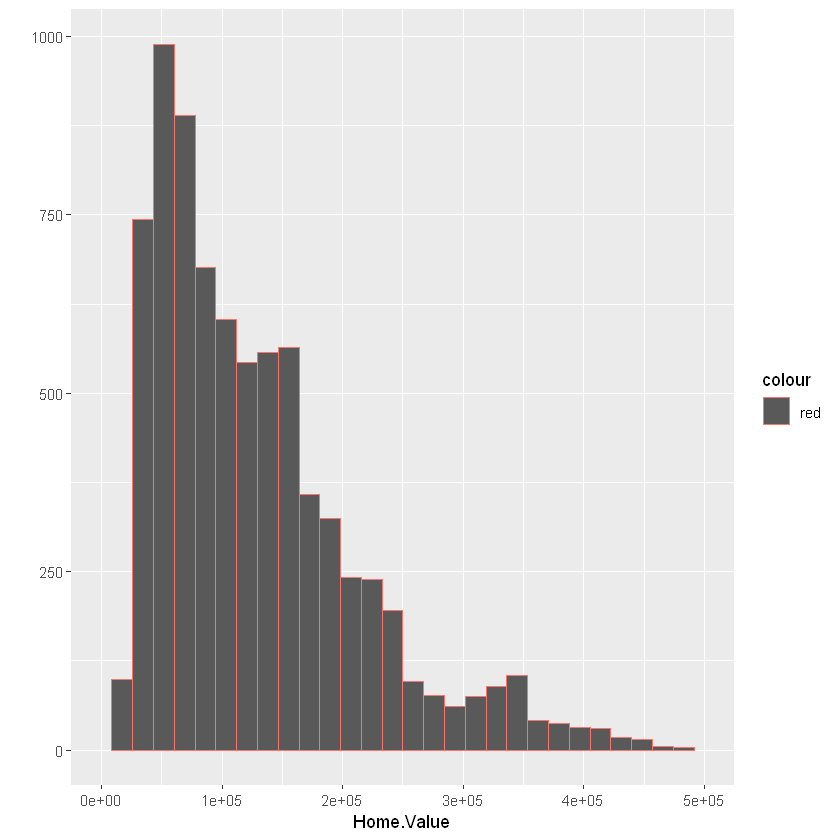

In [32]:
# Customize the histogram further
qplot(data=df,x=Home.Value,geom = 'histogram',xlim=c(0,500000), color='red')